In [1]:
from tensorflow.python.keras.utils import np_utils 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

- np_utils 임포트할 때, tensorflow.keras로는 안됬는데 tensorflow.python.keras로는 됬음. 왜인진 모르겠다

In [2]:
np.random.seed(3)

### 데이터셋 생성하기

In [3]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# 데이터 전처리

x_train = x_train.reshape(50000,784).astype('float32')/255
x_val = x_val.reshape(10000,784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

- 왜 255로 나눈지는 모르겠다

In [8]:
# 훈련셋과 검증셋 고르기(subset하기)

train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [9]:
x_train.shape

(700, 784)

In [10]:
# 라벨데이터 원핫인코딩 처리

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 모델 구성하기

In [40]:
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

### 모델 학습과정 설정하기

In [41]:
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

### 모델 학습시키기

In [13]:
hist = model.fit(x_train,y_train,epochs = 1000, batch_size = 10, validation_data =(x_val, y_val))

Epoch 1/1000
70/70 [==============================] - 0s 4ms/step - loss: 2.2660 - accuracy: 0.1371 - val_loss: 2.2470 - val_accuracy: 0.1233
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2134 - accuracy: 0.1629 - val_loss: 2.2143 - val_accuracy: 0.1400
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1782 - accuracy: 0.1729 - val_loss: 2.1906 - val_accuracy: 0.1767
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1509 - accuracy: 0.2000 - val_loss: 2.1677 - val_accuracy: 0.1800
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1277 - accuracy: 0.2229 - val_loss: 2.1463 - val_accuracy: 0.2133
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1053 - accuracy: 0.2300 - val_loss: 2.1251 - val_accuracy: 0.2333
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0839 - accuracy: 0.2443 - val_loss: 2.1017 - val_accuracy: 0.2467
Epoch 

70/70 [==============================] - 0s 2ms/step - loss: 1.3313 - accuracy: 0.5129 - val_loss: 1.4755 - val_accuracy: 0.4767
Epoch 59/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.3249 - accuracy: 0.5357 - val_loss: 1.4717 - val_accuracy: 0.4767
Epoch 60/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.3187 - accuracy: 0.5271 - val_loss: 1.4738 - val_accuracy: 0.4833
Epoch 61/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.3114 - accuracy: 0.5286 - val_loss: 1.4675 - val_accuracy: 0.4900
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3043 - accuracy: 0.5214 - val_loss: 1.4593 - val_accuracy: 0.4933
Epoch 63/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.2984 - accuracy: 0.5371 - val_loss: 1.4544 - val_accuracy: 0.4967
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2922 - accuracy: 0.5300 - val_loss: 1.4533 - val_accuracy: 0.5067
Epoch 65/1000

70/70 [==============================] - 0s 1ms/step - loss: 1.0981 - accuracy: 0.6314 - val_loss: 1.3901 - val_accuracy: 0.5033
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0949 - accuracy: 0.6400 - val_loss: 1.3867 - val_accuracy: 0.5133
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0930 - accuracy: 0.6371 - val_loss: 1.3904 - val_accuracy: 0.5167
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.6371 - val_loss: 1.4030 - val_accuracy: 0.5100
Epoch 119/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0889 - accuracy: 0.6343 - val_loss: 1.3939 - val_accuracy: 0.4967
Epoch 120/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0849 - accuracy: 0.6443 - val_loss: 1.3856 - val_accuracy: 0.5133
Epoch 121/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.0836 - accuracy: 0.6300 - val_loss: 1.3809 - val_accuracy: 0.5100
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.6786 - val_loss: 1.3843 - val_accuracy: 0.5167
Epoch 173/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9797 - accuracy: 0.6829 - val_loss: 1.3853 - val_accuracy: 0.5300
Epoch 174/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9786 - accuracy: 0.6743 - val_loss: 1.3835 - val_accuracy: 0.5300
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9791 - accuracy: 0.6700 - val_loss: 1.3795 - val_accuracy: 0.5200
Epoch 176/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9778 - accuracy: 0.6757 - val_loss: 1.3923 - val_accuracy: 0.5200
Epoch 177/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9752 - accuracy: 0.6843 - val_loss: 1.3895 - val_accuracy: 0.5367
Epoch 178/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.6786 - val_loss: 1.3851 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.7000 - val_loss: 1.4247 - val_accuracy: 0.5333
Epoch 230/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9065 - accuracy: 0.7000 - val_loss: 1.4271 - val_accuracy: 0.5367
Epoch 231/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9088 - accuracy: 0.6929 - val_loss: 1.4253 - val_accuracy: 0.5367
Epoch 232/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9052 - accuracy: 0.6957 - val_loss: 1.4253 - val_accuracy: 0.5300
Epoch 233/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9056 - accuracy: 0.7014 - val_loss: 1.4279 - val_accuracy: 0.5400
Epoch 234/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9037 - accuracy: 0.6814 - val_loss: 1.4358 - val_accuracy: 0.5333
Epoch 235/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.9014 - accuracy: 0.6886 - val_loss: 1.4282 - val_accuracy:

70/70 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.7100 - val_loss: 1.4785 - val_accuracy: 0.5533
Epoch 286/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.7086 - val_loss: 1.4810 - val_accuracy: 0.5467
Epoch 287/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.7129 - val_loss: 1.4936 - val_accuracy: 0.5433
Epoch 288/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.7229 - val_loss: 1.4778 - val_accuracy: 0.5367
Epoch 289/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.7114 - val_loss: 1.4869 - val_accuracy: 0.5367
Epoch 290/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.7129 - val_loss: 1.4849 - val_accuracy: 0.5433
Epoch 291/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.7157 - val_loss: 1.4807 - val_accuracy: 0.5367
Epoch 2

Epoch 342/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.7514 - val_loss: 1.5472 - val_accuracy: 0.5367
Epoch 343/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.7386 - val_loss: 1.5482 - val_accuracy: 0.5433
Epoch 344/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.7429 - val_loss: 1.5486 - val_accuracy: 0.5600
Epoch 345/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.7414 - val_loss: 1.5621 - val_accuracy: 0.5300
Epoch 346/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.7471 - val_loss: 1.5482 - val_accuracy: 0.5467
Epoch 347/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.7443 - val_loss: 1.5482 - val_accuracy: 0.5367
Epoch 348/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.7486 - val_loss: 1.5588 - val_accuracy:

Epoch 399/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.7500 - val_loss: 1.6261 - val_accuracy: 0.5467
Epoch 400/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7649 - accuracy: 0.7657 - val_loss: 1.6285 - val_accuracy: 0.5267
Epoch 401/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.7586 - val_loss: 1.6391 - val_accuracy: 0.5367
Epoch 402/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.7600 - val_loss: 1.6395 - val_accuracy: 0.5300
Epoch 403/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.7557 - val_loss: 1.6268 - val_accuracy: 0.5267
Epoch 404/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.7657 - val_loss: 1.6372 - val_accuracy: 0.5333
Epoch 405/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7628 - accuracy: 0.7586 - val_loss: 1.6241 - val_accuracy:

Epoch 456/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.7729 - val_loss: 1.7020 - val_accuracy: 0.5367
Epoch 457/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.7771 - val_loss: 1.7119 - val_accuracy: 0.5233
Epoch 458/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.7757 - val_loss: 1.7038 - val_accuracy: 0.5367
Epoch 459/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.7757 - val_loss: 1.7072 - val_accuracy: 0.5333
Epoch 460/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.7800 - val_loss: 1.7096 - val_accuracy: 0.5300
Epoch 461/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.7714 - val_loss: 1.7221 - val_accuracy: 0.5333
Epoch 462/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.7280 - accuracy: 0.7814 - val_loss: 1.7139 - val_accuracy:

Epoch 513/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.7871 - val_loss: 1.7869 - val_accuracy: 0.5267
Epoch 514/1000
70/70 [==============================] - 0s 5ms/step - loss: 0.7007 - accuracy: 0.7843 - val_loss: 1.7816 - val_accuracy: 0.5233
Epoch 515/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.7002 - accuracy: 0.7857 - val_loss: 1.7930 - val_accuracy: 0.5300
Epoch 516/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.7843 - val_loss: 1.7880 - val_accuracy: 0.5400
Epoch 517/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.7886 - val_loss: 1.7913 - val_accuracy: 0.5267
Epoch 518/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.7857 - val_loss: 1.7874 - val_accuracy: 0.5367
Epoch 519/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.7871 - val_loss: 1.7945 - val_accuracy:

Epoch 570/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.8000 - val_loss: 1.8731 - val_accuracy: 0.5200
Epoch 571/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.7971 - val_loss: 1.8663 - val_accuracy: 0.5300
Epoch 572/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.7957 - val_loss: 1.8822 - val_accuracy: 0.5200
Epoch 573/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.7971 - val_loss: 1.8785 - val_accuracy: 0.5200
Epoch 574/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.8000 - val_loss: 1.8745 - val_accuracy: 0.5200
Epoch 575/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.8000 - val_loss: 1.8725 - val_accuracy: 0.5067
Epoch 576/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.8029 - val_loss: 1.8770 - val_accuracy:

Epoch 627/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.8100 - val_loss: 1.9641 - val_accuracy: 0.5033
Epoch 628/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.8143 - val_loss: 1.9653 - val_accuracy: 0.5167
Epoch 629/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.8143 - val_loss: 1.9575 - val_accuracy: 0.5233
Epoch 630/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.8157 - val_loss: 1.9638 - val_accuracy: 0.5200
Epoch 631/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.8143 - val_loss: 1.9537 - val_accuracy: 0.5133
Epoch 632/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.8114 - val_loss: 1.9449 - val_accuracy: 0.5100
Epoch 633/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.8057 - val_loss: 1.9663 - val_accuracy:

Epoch 684/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.8214 - val_loss: 2.0593 - val_accuracy: 0.5133
Epoch 685/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.8229 - val_loss: 2.0427 - val_accuracy: 0.5167
Epoch 686/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.8200 - val_loss: 2.0477 - val_accuracy: 0.5033
Epoch 687/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.8257 - val_loss: 2.0629 - val_accuracy: 0.5033
Epoch 688/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.8186 - val_loss: 2.0504 - val_accuracy: 0.5100
Epoch 689/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.8229 - val_loss: 2.0611 - val_accuracy: 0.5100
Epoch 690/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.8243 - val_loss: 2.0552 - val_accuracy:

Epoch 741/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.8314 - val_loss: 2.1544 - val_accuracy: 0.5000
Epoch 742/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8286 - val_loss: 2.1424 - val_accuracy: 0.5100
Epoch 743/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.8271 - val_loss: 2.1398 - val_accuracy: 0.5100
Epoch 744/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.8357 - val_loss: 2.1576 - val_accuracy: 0.5033
Epoch 745/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8271 - val_loss: 2.1644 - val_accuracy: 0.4967
Epoch 746/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.8343 - val_loss: 2.1418 - val_accuracy: 0.5033
Epoch 747/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.8329 - val_loss: 2.1598 - val_accuracy:

Epoch 798/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.8329 - val_loss: 2.2430 - val_accuracy: 0.4967
Epoch 799/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.8371 - val_loss: 2.2196 - val_accuracy: 0.4967
Epoch 800/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.8329 - val_loss: 2.2346 - val_accuracy: 0.5100
Epoch 801/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.8371 - val_loss: 2.2527 - val_accuracy: 0.4900
Epoch 802/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.8386 - val_loss: 2.2421 - val_accuracy: 0.5000
Epoch 803/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.8386 - val_loss: 2.2319 - val_accuracy: 0.5133
Epoch 804/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.8400 - val_loss: 2.2573 - val_accuracy:

Epoch 855/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.8471 - val_loss: 2.3184 - val_accuracy: 0.5000
Epoch 856/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8400 - val_loss: 2.3097 - val_accuracy: 0.4933
Epoch 857/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8457 - val_loss: 2.3186 - val_accuracy: 0.4967
Epoch 858/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8386 - val_loss: 2.3462 - val_accuracy: 0.5000
Epoch 859/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8471 - val_loss: 2.3455 - val_accuracy: 0.5033
Epoch 860/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.8457 - val_loss: 2.3449 - val_accuracy: 0.4967
Epoch 861/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.8457 - val_loss: 2.3333 - val_accuracy:

Epoch 912/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.8543 - val_loss: 2.4093 - val_accuracy: 0.5000
Epoch 913/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.8543 - val_loss: 2.4045 - val_accuracy: 0.4900
Epoch 914/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.8514 - val_loss: 2.4331 - val_accuracy: 0.4900
Epoch 915/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.8486 - val_loss: 2.4189 - val_accuracy: 0.4967
Epoch 916/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.8514 - val_loss: 2.4381 - val_accuracy: 0.4933
Epoch 917/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.8529 - val_loss: 2.4194 - val_accuracy: 0.4967
Epoch 918/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8486 - val_loss: 2.4209 - val_accuracy:

Epoch 969/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8529 - val_loss: 2.5045 - val_accuracy: 0.5000
Epoch 970/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8557 - val_loss: 2.5198 - val_accuracy: 0.4967
Epoch 971/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.8600 - val_loss: 2.5241 - val_accuracy: 0.4833
Epoch 972/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8529 - val_loss: 2.5321 - val_accuracy: 0.4833
Epoch 973/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.8557 - val_loss: 2.5407 - val_accuracy: 0.4800
Epoch 974/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.8571 - val_loss: 2.5071 - val_accuracy: 0.4900
Epoch 975/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.8514 - val_loss: 2.5135 - val_accuracy:

### 학습과정 살펴보기

- .twinx() : x축은 동일하지만 y축은 동일하지않은(y축이 두개인) 그래프

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

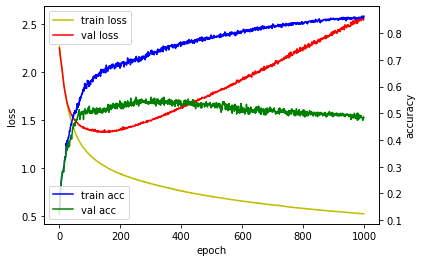

In [15]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label = 'train loss')
loss_ax.plot(hist.history['val_loss'],'r',label = 'val loss')

acc_ax.plot(hist.history['accuracy'],'b',label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [25]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

313/313 [==============================] - 0s 895us/step - loss: 2.8061 - accuracy: 0.4791


In [28]:
print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))


loss : 2.806114912033081
accuracy : 0.47909998893737793


### 조기종료 시키기
- EarlyStopping() : 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수
- 콜백함수 : 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것
- 여기서는 fit()함수에서 EarlyStopping() 콜백함수가 매번 호출됨

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

#### EarlyStopping 함수
tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, verbose = 0, mode = 'auto')
- monitor : 관찰하고자 하는 항목. 'val_loss'나 'val_acc'가 주로 사용됨.
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량
- patience : 개선이 없는 에포크를 얼마나 기다려 줄 것인지
- verbose : 얼마나 자세하게 정보를 표시할 것인가(0,1,2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준(auto, min, max)

In [43]:
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

early_stopping = EarlyStopping()
hist2 = model.fit(x_train,y_train,epochs = 1000, batch_size = 10, validation_data =(x_val, y_val), callbacks = [early_stopping])

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2868 - accuracy: 0.1386 - val_loss: 2.2528 - val_accuracy: 0.1633
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2315 - accuracy: 0.1943 - val_loss: 2.1784 - val_accuracy: 0.2400
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1601 - accuracy: 0.2143 - val_loss: 2.0950 - val_accuracy: 0.2667
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0878 - accuracy: 0.2314 - val_loss: 2.0340 - val_accuracy: 0.2700
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0321 - accuracy: 0.2457 - val_loss: 1.9844 - val_accuracy: 0.2667
Epoch 6/1000
70/70 [==============================] - 0s 3ms/step - loss: 1.9806 - accuracy: 0.2486 - val_loss: 1.9397 - val_accuracy: 0.2667
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.9315 - accuracy: 0.2743 - val_loss: 1.8981 - val_accuracy: 0.2767
Epoch 

### 학습과정 살펴보기

- .twinx() : x축은 동일하지만 y축은 동일하지않은(y축이 두개인) 그래프

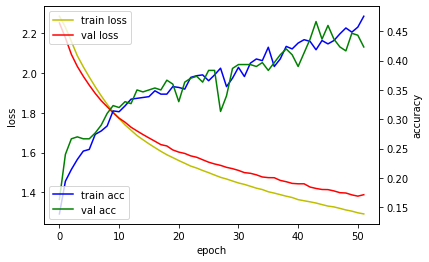

In [46]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'],'y',label = 'train loss')
loss_ax.plot(hist2.history['val_loss'],'r',label = 'val loss')

acc_ax.plot(hist2.history['accuracy'],'b',label = 'train acc')
acc_ax.plot(hist2.history['val_accuracy'],'g',label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [47]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 0s 1ms/step - loss: 1.4084 - accuracy: 0.4250

loss : 1.4084213972091675
accuracy : 0.42500001192092896
